In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import torch

import warnings
warnings.filterwarnings("ignore")

PATH_1 = 'own-images/projected/align-man04.jpg/projected_w.npz'
PATH_2 = 'own-images/projected/align-man09.jpg/projected_w.npz'

In [2]:
with open('ffhq.pkl', 'rb') as f:
    G = pickle.load(f)['G_ema'].cuda()

In [3]:
def interpolate_points(p1, p2, n_steps=10):
    # interpolate ratios between the points
    ratios = np.linspace(0, 1, num=n_steps)
    # linear interpolate vectors
    vectors = list()
    for ratio in ratios:
        v = (1.0 - ratio) * p1 + ratio * p2
        vectors.append(v)
    return np.asarray(vectors)

In [4]:
img1 = np.load(PATH_1)['w']    
img2 = np.load(PATH_2)['w']

interpolated = interpolate_points(img1, img2)
# generate images
X = G.synthesis(torch.Tensor(interpolated[:, 0, :, :]).cuda()).cpu()
# scale from [-1,1] to [0,1]
X = (X + 1) / 2.0

Setting up PyTorch plugin "bias_act_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

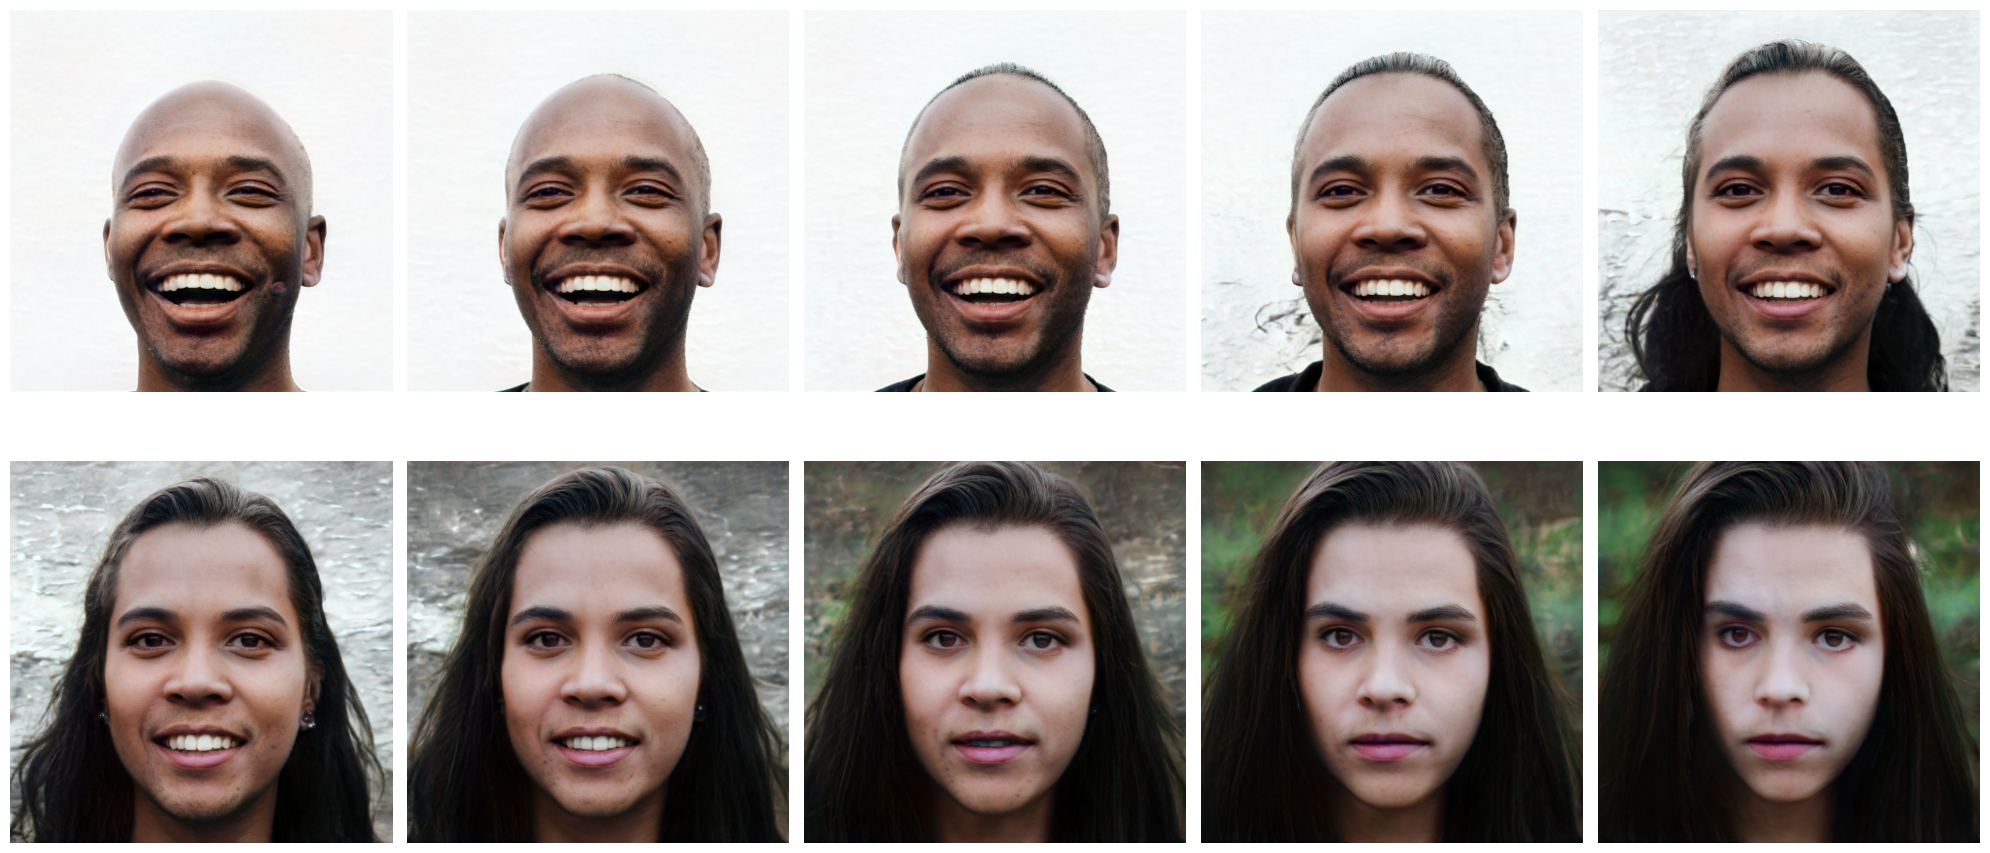

In [8]:
# plotting
fig, ax = plt.subplots(2,5, figsize=(20,10))
for i in range(10):
    x = X[i]
    # turn off axis
    ax[i//5, i%5].axis('off')
    # plot raw pixel data
    ax[i//5, i%5].imshow(x.detach().permute(1,2,0))
plt.tight_layout()
plt.show()